In [1]:
# Classification Random Forest
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('data/wine_train.csv')

In [3]:
data.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6


In [4]:
data.shape

(3673, 12)

In [7]:
X = data.iloc[:,0:11].values
y = data.iloc[:, 11].values

In [8]:
X

array([[ 9.   ,  0.245,  0.38 , ...,  2.93 ,  0.35 , 10.2  ],
       [ 8.2  ,  0.42 ,  0.29 , ...,  3.   ,  0.32 , 12.8  ],
       [ 6.4  ,  0.22 ,  0.32 , ...,  3.13 ,  0.55 , 10.9  ],
       ...,
       [ 8.   ,  0.26 ,  0.28 , ...,  3.12 ,  0.56 , 10.   ],
       [ 6.7  ,  0.15 ,  0.29 , ...,  3.52 ,  0.44 , 10.2  ],
       [ 6.4  ,  0.23 ,  0.26 , ...,  3.12 ,  0.49 ,  9.4  ]])

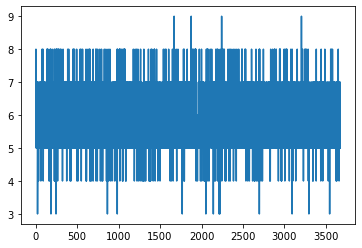

In [23]:
plt.plot(y)

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, 
                                    criterion='entropy',#"gini"
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.,
                                    max_features="auto",#'sqrt','log2',None
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=1,
                                    random_state=0,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None)

model_rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=1,
                       random_state=0)

In [28]:
# Predicting the Test set results
y_pred = model_rf.predict(X_test)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_f = confusion_matrix(y_test, y_pred)
cm_f

array([[  0,   0,   0,   2,   1,   0,   0],
       [  0,   6,  18,   9,   0,   0,   0],
       [  0,   9, 188,  75,   3,   0,   0],
       [  0,   0,  91, 282,  34,   2,   0],
       [  0,   1,  11,  61,  83,   2,   0],
       [  0,   0,   4,  13,   7,  16,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

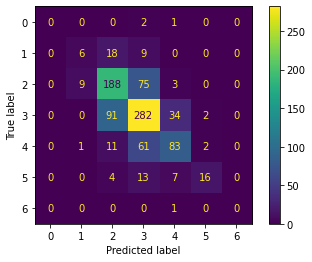

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm_f).plot()

In [31]:
model_rf.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [56]:
taste = []
ids = []
ind = 1
for i in y_pred:
    if i == 6:
        taste.append('normal')
        ids.append(ind)
    if i < 6:
        taste.append('bad')
        ids.append(ind)
    if i > 6:
        taste.append('good')
        ids.append(ind)
    ind = ind +1


In [57]:
taste

['normal',
 'normal',
 'bad',
 'good',
 'bad',
 'normal',
 'bad',
 'bad',
 'bad',
 'normal',
 'normal',
 'normal',
 'normal',
 'bad',
 'bad',
 'normal',
 'normal',
 'bad',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'bad',
 'good',
 'normal',
 'bad',
 'bad',
 'good',
 'normal',
 'bad',
 'normal',
 'normal',
 'bad',
 'normal',
 'normal',
 'normal',
 'good',
 'good',
 'normal',
 'normal',
 'good',
 'normal',
 'normal',
 'bad',
 'normal',
 'good',
 'good',
 'normal',
 'bad',
 'bad',
 'good',
 'normal',
 'normal',
 'normal',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'normal',
 'normal',
 'good',
 'good',
 'bad',
 'normal',
 'normal',
 'normal',
 'good',
 'bad',
 'bad',
 'bad',
 'normal',
 'normal',
 'good',
 'good',
 'normal',
 'good',
 'good',
 'normal',
 'bad',
 'bad',
 'good',
 'normal',
 'normal',
 'good',
 'normal',
 'good',
 'good',
 'bad',
 'normal',
 'bad',
 'bad',
 'normal',
 'normal',
 'bad',
 'normal',
 'good',
 'normal',
 'bad',
 'normal',
 'bad',
 'bad',
 'bad',
 'b

In [59]:
submission = pd.DataFrame([ids,taste]).T

In [60]:
submission.head(5)

,0,1
0,1,normal
1,2,normal
2,3,bad
3,4,good
4,5,bad


In [61]:
submission.columns = ['id','taste']

In [62]:
submission.head(5)

,id,taste
0,1,normal
1,2,normal
2,3,bad
3,4,good
4,5,bad


In [64]:
submission.to_csv('sub.csv',index=False)